In [2]:
from multi_time_gnn.dataset import read_dataset
dataset = read_dataset("eeg", path_eeg="../../ds002778/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf")

Extracting BDF parameters from ../../ds002778/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf...
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 99327  =      0.000 ...   193.998 secs...


In [3]:
from multi_time_gnn.preprocessing import preprocess_eeg

In [14]:
from multi_time_gnn.dataset import get_normalizer

In [ ]:
from collections import namedtuple

# Define a box with (x_min, y_min, x_max, y_max)
Box = namedtuple('Box', ['path_eeg', 'eeg_lowpass_cutoff', 'eeg_highpass_cutoff', 'eeg_target_fs'])
config = Box(
    "../../ds002778/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf",
     50,
     0.5,
    100)

In [ ]:
dataset_preprocessed = preprocess_eeg(dataset, config)


Extracting BDF parameters from ../../ds002778/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf...
Setting channel info structure...
Creating raw.info structure...


In [16]:
normalizer = get_normalizer("zscore", dataset)

In [17]:
dataset_preprocessed_normalized = normalizer.normalize(dataset_preprocessed)

In [7]:
import matplotlib.pyplot as plt

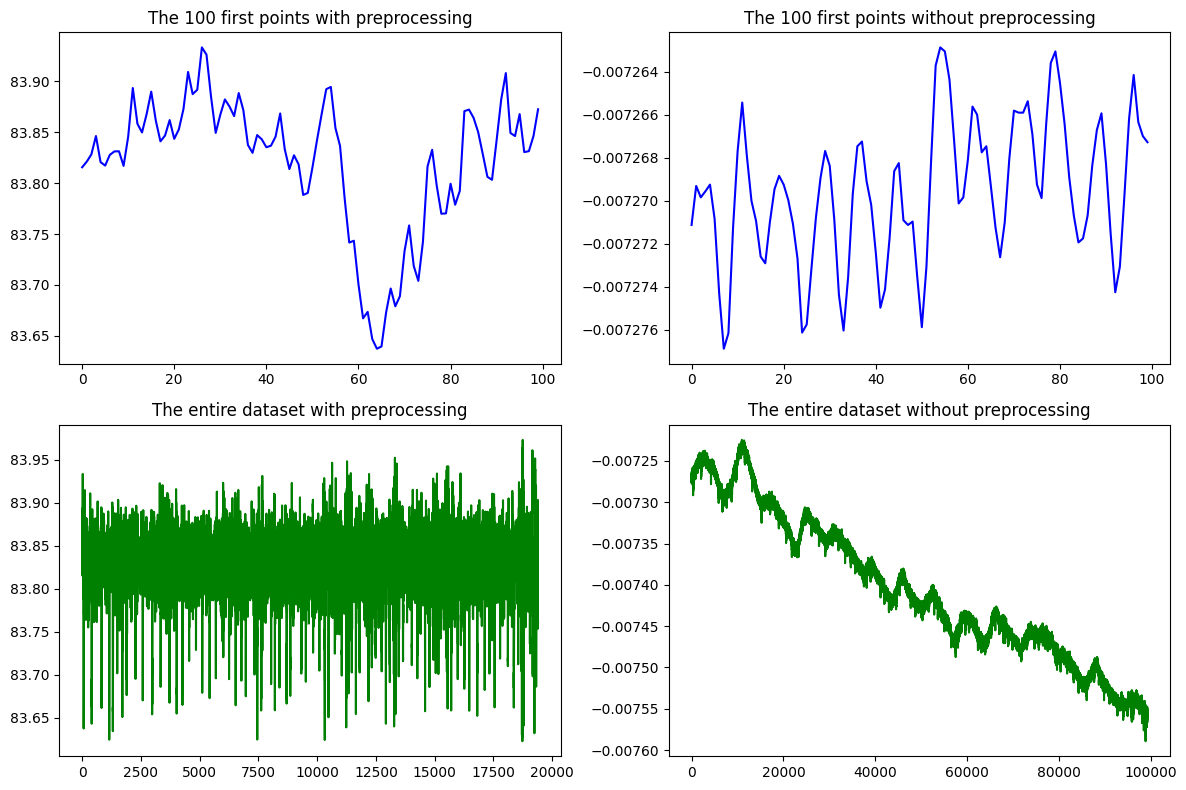

In [18]:
channel = 8
plot_length = 100

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot on each subplot
axes[0, 0].plot(dataset_preprocessed_normalized[channel][:plot_length], color='blue')
axes[0, 0].set_title(f'The {plot_length} first points with preprocessing')

axes[0, 1].plot(dataset[channel][:plot_length], color='blue')
axes[0, 1].set_title(f'The {plot_length} first points without preprocessing')

axes[1, 0].plot(dataset_preprocessed_normalized[channel], color='green')
axes[1, 0].set_title(f'The entire dataset with preprocessing')

axes[1, 1].plot(dataset[channel], color='green')
axes[1, 1].set_title(f'The entire dataset without preprocessing')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("prepocessing.png")
plt.show()